In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

C:\Users\datas\AppData\Local\Temp\ipykernel_5880\370578000.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data = pd.read_csv('train1.csv', na_values='-')
data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,NaN,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,19237.0,4.557654e+07,936591.422799,20746880.0,45698374.0,45772308.0,45802036.0,45816654.0
Price,19237.0,1.855593e+04,190581.269684,1.0,5331.0,13172.0,22075.0,26307500.0
Levy,13418.0,9.068381e+02,461.867051,87.0,640.0,781.0,1058.0,11714.0
Prod. year,19237.0,2.010913e+03,5.668673,1939.0,2009.0,2012.0,2015.0,2020.0
Cylinders,19237.0,4.582991e+00,1.199933,1.0,4.0,4.0,4.0,16.0
Airbags,19237.0,6.582627e+00,4.320168,0.0,4.0,6.0,12.0,16.0


In [4]:
data.isnull().sum().sort_values(ascending=False)

Levy                5819
ID                     0
Mileage                0
Color                  0
Wheel                  0
Doors                  0
Drive wheels           0
Gear box type          0
Cylinders              0
Engine volume          0
Price                  0
Fuel type              0
Leather interior       0
Category               0
Prod. year             0
Model                  0
Manufacturer           0
Airbags                0
dtype: int64

In [5]:
data.nunique()

ID                  18924
Price                2315
Levy                  558
Manufacturer           65
Model                1590
Prod. year             54
Category               11
Leather interior        2
Fuel type               7
Engine volume         107
Mileage              7687
Cylinders              13
Gear box type           4
Drive wheels            3
Doors                   3
Wheel                   2
Color                  16
Airbags                17
dtype: int64

In [6]:
numerical = [i for i in data.columns if data[i].dtype!='O']
numerical

['ID', 'Price', 'Levy', 'Prod. year', 'Cylinders', 'Airbags']

In [7]:
corr_matrix = data[numerical[1:]].corr()

<Axes: >

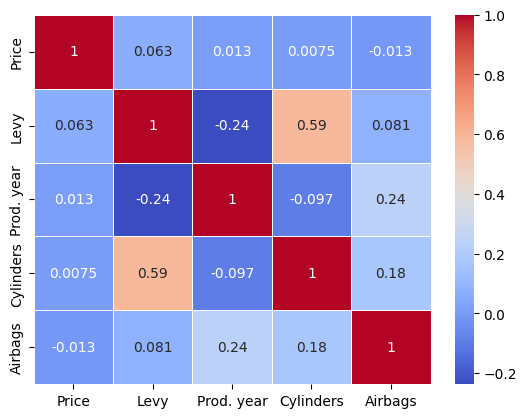

In [8]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

In [9]:
#remove duplicated rows
data = data[~data.duplicated()]

In [10]:
data.drop(columns=['ID'], inplace=True)

In [11]:
data['Levy'].isnull().sum()

5709

In [12]:
from sklearn.impute import KNNImputer
# Replace the missing values in Levy with knn imputer
impute = KNNImputer(n_neighbors=5)
data['Levy'] = impute.fit_transform(data['Levy'].values.reshape(-1,1))
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             18924 non-null  int64  
 1   Levy              18924 non-null  float64
 2   Manufacturer      18924 non-null  object 
 3   Model             18924 non-null  object 
 4   Prod. year        18924 non-null  int64  
 5   Category          18924 non-null  object 
 6   Leather interior  18924 non-null  object 
 7   Fuel type         18924 non-null  object 
 8   Engine volume     18924 non-null  object 
 9   Mileage           18924 non-null  object 
 10  Cylinders         18924 non-null  float64
 11  Gear box type     18924 non-null  object 
 12  Drive wheels      18924 non-null  object 
 13  Doors             18924 non-null  object 
 14  Wheel             18924 non-null  object 
 15  Color             18924 non-null  object 
 16  Airbags           18924 non-null  int64  
dty

In [13]:
price_column = data['Price']

# Calculate the IQR (Interquartile Range)
Q1 = price_column.quantile(0.25)
Q3 = price_column.quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = (price_column < lower_bound) | (price_column > upper_bound)

# Count and print the number of outliers
num_outliers = np.sum(outliers)
print(f'Number of outliers: {num_outliers}')

# Remove outliers from the DataFrame
df= data[~outliers]

Number of outliers: 1055


In [14]:
df.shape

(17869, 17)

In [15]:
df['Leather interior'].value_counts()

Leather interior
Yes    12737
No      5132
Name: count, dtype: int64

In [16]:
df['Leather interior'] = df['Leather interior'].replace('Yes', 1)
df['Leather interior'] = df['Leather interior'].replace('No', 0)
df['Leather interior'].value_counts()

C:\Users\datas\AppData\Local\Temp\ipykernel_5880\3938191515.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Leather interior'] = df['Leather interior'].replace('Yes', 1)
C:\Users\datas\AppData\Local\Temp\ipykernel_5880\3938191515.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Leather interior'] = df['Leather interior'].replace('No', 0)
C:\Users\datas\AppData\Local\Temp\ipykernel_5880\3938191515.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

Leather interior
1    12737
0     5132
Name: count, dtype: int64

In [17]:
df['Engine volume'].value_counts()

Engine volume
2            3573
2.5          2167
1.8          1742
1.6          1428
1.5          1248
             ... 
4.2 Turbo       1
6.7             1
3.1             1
0.8 Turbo       1
1.1 Turbo       1
Name: count, Length: 103, dtype: int64

In [18]:
engineVolume=data['Engine volume'].apply(lambda x: float(x.split(' ')[0]))
df['Engine volume']=engineVolume
df['Engine volume'].value_counts()

C:\Users\datas\AppData\Local\Temp\ipykernel_5880\181378898.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Engine volume']=engineVolume


Engine volume
2.0    3922
2.5    2250
1.8    1917
1.6    1541
1.5    1313
       ... 
7.3       1
0.5       1
3.1       1
5.2       1
5.8       1
Name: count, Length: 64, dtype: int64

In [19]:
# Remove 'km' string from 'Mileage' and convert to numeric
df['Mileage'] = df['Mileage'].replace(' km', '', regex=True).astype(float)

C:\Users\datas\AppData\Local\Temp\ipykernel_5880\3102973306.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Mileage'] = df['Mileage'].replace(' km', '', regex=True).astype(float)


In [20]:
df['Doors'].value_counts()

Doors
04-May    17028
02-Mar      729
>5          112
Name: count, dtype: int64

In [21]:
df['Doors'] = df['Doors'].replace({'04-May': '4-5', '02-Mar': '2-3'})

C:\Users\datas\AppData\Local\Temp\ipykernel_5880\370691956.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Doors'] = df['Doors'].replace({'04-May': '4-5', '02-Mar': '2-3'})


In [22]:
df['Doors'] = df['Doors'].astype('category')

C:\Users\datas\AppData\Local\Temp\ipykernel_5880\1854292667.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Doors'] = df['Doors'].astype('category')


C:\Users\datas\AppData\Local\Temp\ipykernel_5880\3562206015.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sorted_data = df.groupby(column)['Price'].mean().sort_values(ascending=False).index


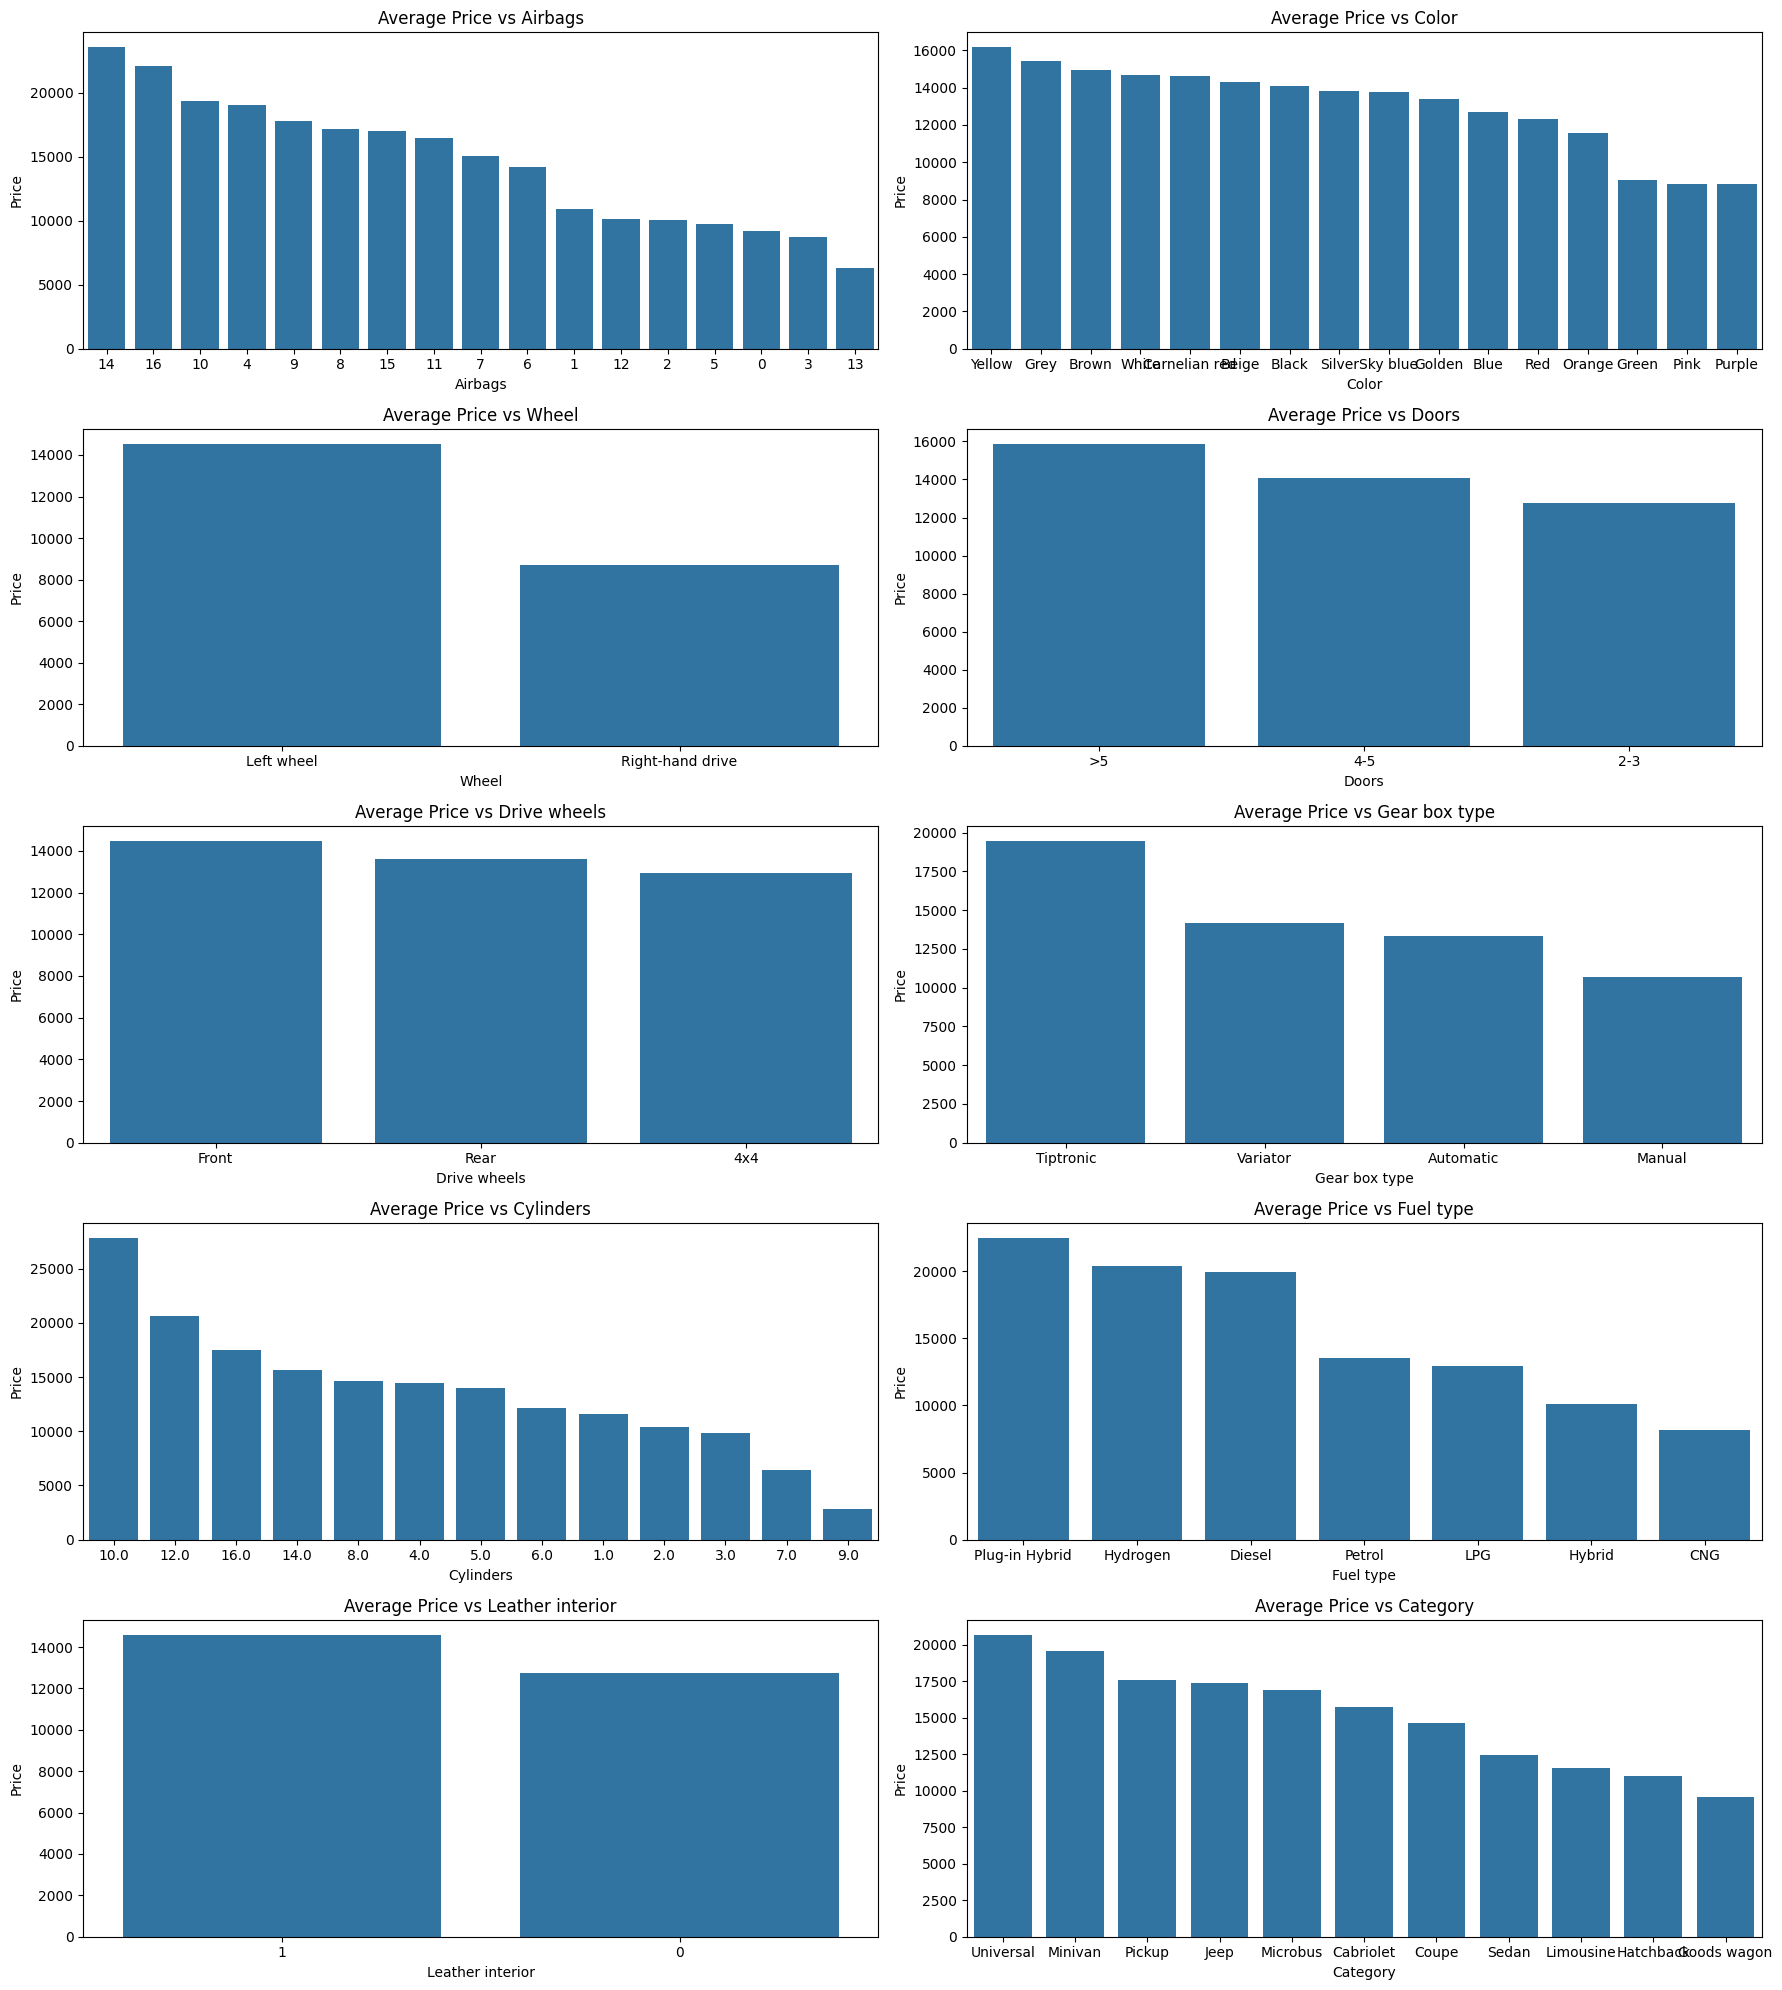

In [23]:
columns_to_plot = ['Airbags', 'Color', 'Wheel', 'Doors', 'Drive wheels', 'Gear box type', 'Cylinders', 'Fuel type', 'Leather interior', 'Category']

# Create a 5x2 subplot grid
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(18, 20))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Iterate over the columns and create bar plots
for i, column in enumerate(columns_to_plot):
    # Sort the data by the average price in descending order
    sorted_data = df.groupby(column)['Price'].mean().sort_values(ascending=False).index
    
    sns.barplot(x=column, y='Price', data=df, order=sorted_data, ax=axes[i], errorbar=None)
    axes[i].set_title(f'Average Price vs {column}')

# Adjust layout
plt.tight_layout()
plt.show()

In [24]:
df['Age'] = 2024 - df['Prod. year']

# Assuming df is your DataFrame
df = df.drop(columns=['Prod. year'])

C:\Users\datas\AppData\Local\Temp\ipykernel_5880\2959609659.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = 2024 - df['Prod. year']


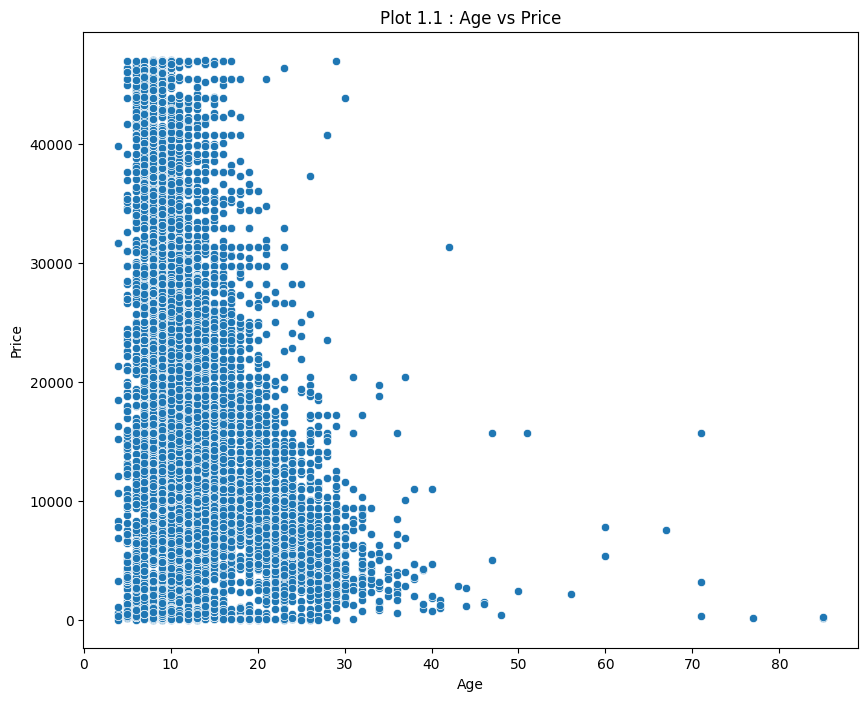

In [25]:
plt.figure(figsize=(10,8))
plt.title("Plot 1.1 : Age vs Price")
sns.scatterplot(x='Age',y='Price',data=df)
plt.show()

C:\Users\datas\AppData\Local\Temp\ipykernel_5880\525207869.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\Users\datas\AppData\Local\Temp\ipykernel_5880\525207869.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\Users\datas\AppData\Local\Temp\ipykernel_5880\5252078

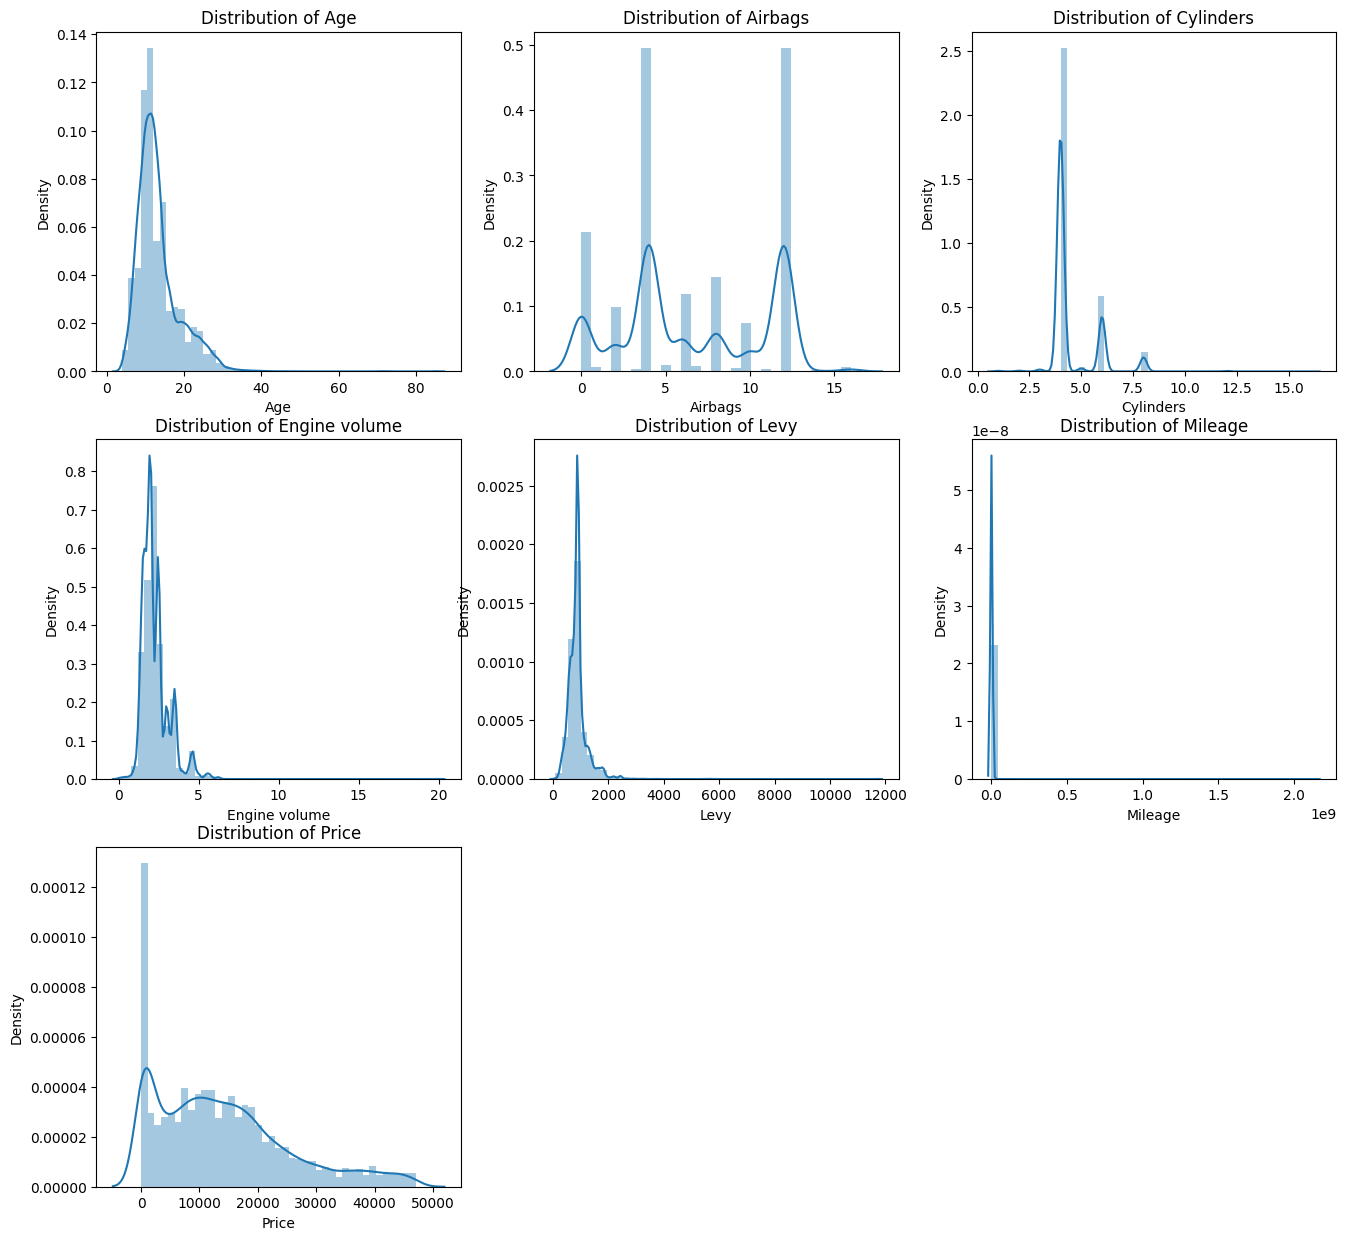

In [26]:
ncols = ["Age","Airbags","Cylinders","Engine volume","Levy","Mileage","Price"]
plt.figure(figsize=(16,15))
for i,col in enumerate(ncols):
    plt.subplot(3,3,i+1).set_title("Distribution of "+col)
    sns.distplot(df[col])

In [27]:
columns_to_check = ['Levy', 'Engine volume', 'Mileage','Cylinders']# Not including Airbags since distro seems normal

# Dictionary to store outlier counts
outlier_counts = {}

# Function to remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define the threshold for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find and count outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outlier_count = outliers.shape[0]

    # Remove outliers from the DataFrame
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df_cleaned, outlier_count

# Iterate over columns, remove outliers, and store counts
for column in columns_to_check:
    df, count = remove_outliers_iqr(df, column)
    outlier_counts[column] = count

# Display outlier counts
print("Outlier Counts:")
for column, count in outlier_counts.items():
    print(f"{column}: {count}")

Outlier Counts:
Levy: 2692
Engine volume: 335
Mileage: 547
Cylinders: 2597


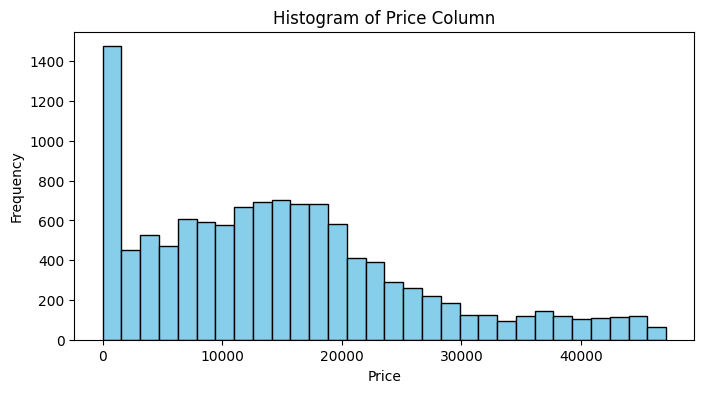

In [28]:
import matplotlib.pyplot as plt

# Assuming df_encoded is your DataFrame
plt.figure(figsize=(8, 4))
plt.hist(df['Price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Price Column')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [29]:
rows_with_low_price = df[df['Price'] < 500]

# Display the DataFrame with horizontal scrolling
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
display(rows_with_low_price)

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Age
27,30,906.299205,TOYOTA,Prius,Sedan,0,Hybrid,1.5,169000.0,4.0,Automatic,Front,4-5,Left wheel,White,8,16
53,392,1017.000000,MERCEDES-BENZ,E 300,Sedan,1,Petrol,2.0,1600.0,4.0,Automatic,Rear,4-5,Left wheel,Black,12,7
68,314,779.000000,TOYOTA,Camry,Sedan,1,Hybrid,2.5,225510.0,4.0,Automatic,Front,4-5,Left wheel,White,12,11
79,220,1185.000000,FORD,Escape,Jeep,1,Hybrid,2.5,193614.0,4.0,Automatic,Front,4-5,Left wheel,White,0,15
117,94,906.299205,HONDA,FIT,Hatchback,0,Petrol,1.5,178000.0,4.0,Variator,Front,4-5,Right-hand drive,Silver,4,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19215,470,831.000000,HYUNDAI,Elantra,Sedan,1,Petrol,1.6,25635.0,4.0,Automatic,Front,4-5,Left wheel,Black,12,7
19218,30,906.299205,NISSAN,Note,Hatchback,0,Petrol,1.3,0.0,4.0,Automatic,Front,4-5,Right-hand drive,Green,9,18
19229,50,906.299205,TOYOTA,Prius,Hatchback,0,Hybrid,1.5,150000.0,4.0,Automatic,Front,4-5,Left wheel,Silver,6,16
19230,470,645.000000,TOYOTA,Prius,Hatchback,1,Hybrid,1.8,307325.0,4.0,Automatic,Front,4-5,Left wheel,Silver,12,13


In [30]:
df = df[df['Price'] >= 500]
df

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Age
2,8467,906.299205,HONDA,FIT,Hatchback,0,Petrol,1.3,200000.0,4.0,Variator,Front,4-5,Right-hand drive,Black,2,18
3,3607,862.000000,FORD,Escape,Jeep,1,Hybrid,2.5,168966.0,4.0,Automatic,4x4,4-5,Left wheel,White,0,13
4,11726,446.000000,HONDA,FIT,Hatchback,1,Petrol,1.3,91901.0,4.0,Automatic,Front,4-5,Left wheel,Silver,4,10
5,39493,891.000000,HYUNDAI,Santa FE,Jeep,1,Diesel,2.0,160931.0,4.0,Automatic,Front,4-5,Left wheel,White,4,8
6,1803,761.000000,TOYOTA,Prius,Hatchback,1,Hybrid,1.8,258909.0,4.0,Automatic,Front,4-5,Left wheel,White,12,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19224,19130,906.299205,KIA,Optima ex,Sedan,1,Petrol,2.4,35800.0,4.0,Automatic,Front,4-5,Left wheel,Black,12,10
19225,8781,1107.000000,OPEL,Combo,Goods wagon,0,Diesel,1.7,236000.0,4.0,Manual,Front,4-5,Left wheel,Beige,4,17
19232,8467,906.299205,MERCEDES-BENZ,CLK 200,Coupe,1,CNG,2.0,300000.0,4.0,Manual,Rear,2-3,Left wheel,Silver,5,25
19233,15681,831.000000,HYUNDAI,Sonata,Sedan,1,Petrol,2.4,161600.0,4.0,Tiptronic,Front,4-5,Left wheel,Red,8,13


In [31]:
#df.drop(columns=['Manufacturer', 'Model', 'Category'], inplace=True)

In [32]:
from sklearn.preprocessing import  OneHotEncoder

categorical_columns = df.select_dtypes(include=['object', 'category']).columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [33]:
for column in df_encoded.columns:
   
    if df_encoded[column].dtype == bool:
        
        df_encoded[column] = df_encoded[column].astype(int)

df_encoded

Price         Levy  Leather interior  Engine volume   Mileage  \
2       8467   906.299205                 0            1.3  200000.0   
3       3607   862.000000                 1            2.5  168966.0   
4      11726   446.000000                 1            1.3   91901.0   
5      39493   891.000000                 1            2.0  160931.0   
6       1803   761.000000                 1            1.8  258909.0   
...      ...          ...               ...            ...       ...   
19224  19130   906.299205                 1            2.4   35800.0   
19225   8781  1107.000000                 0            1.7  236000.0   
19232   8467   906.299205                 1            2.0  300000.0   
19233  15681   831.000000                 1            2.4  161600.0   
19234  26108   836.000000                 1            2.0  116365.0   

       Cylinders  Airbags  Age  Manufacturer_ALFA ROMEO  Manufacturer_AUDI  \
2            4.0        2   18                        0                  0   
3            4.0        0   13                        0                  0   
4            4.0        4   10                        0                  0   
5            4.0        4    8                        0                  0   
6            4.0       12   14                        0                  0   
...          ...      ...  ...                      ...                ...   
19224        4.0       12   10                        0                  0   
19225        4.0        4   17                        0                  0   
19232        4.0        5   25                        0                  0   
19233        4.0        8   13                        0                  0   
19234        4.0        4   14                        0                  0   

       Manufacturer_BMW  Manufacturer_BUICK  Manufacturer_CADILLAC  \
2                     0                   0                      0   
3                     0                   0                      0   
4                     0                   0                      0   
5                     0                   0                      0   
6                     0                   0                      0   
...                 ...                 ...                    ...   
19224                 0                   0                      0   
19225                 0                   0                      0   
19232                 0                   0                      0   
19233                 0                   0                      0   
19234                 0                   0                      0   

       Manufacturer_CHEVROLET  Manufacturer_CHRYSLER  Manufacturer_CITROEN  \
2                           0                      0                     0   
3                           0                      0                     0   
4                           0                      0                     0   
5                           0                      0                     0   
6                           0                      0                     0   
...                       ...                    ...                   ...   
19224                       0                      0                     0   
19225                       0                      0                     0   
19232                       0                      0                     0   
19233                       0                      0                     0   
19234                       0                      0                     0   

       Manufacturer_DAEWOO  Manufacturer_DAIHATSU  Manufacturer_DODGE  \
2                        0                      0                   0   
3                        0                      0                   0   
4                        0                      0                   0   
5                        0                      0                   0   
6                        0                      0             

In [34]:
import re
df_encoded = df_encoded.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [35]:
df_encoded = df_encoded.loc[:,~df_encoded.columns.duplicated()]

In [36]:
X = df_encoded.drop(columns=['Price','Cylinders'])
y = df_encoded['Price']

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size=0.7, test_size=0.3, random_state=100)

In [38]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=15,
                      min_samples_leaf=5,
                          criterion='friedman_mse')
dt.fit(X_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=15,
                      min_samples_leaf=5)

In [39]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae
y_pred_test = dt.predict(X_test)
r2_score_test = r2_score(y_test,y_pred_test)
mae_score_test = mae(y_test,y_pred_test)
print('R2 score for test set: {0}'.format(r2_score_test))
print('MAE score for test set: {0}'.format(mae_score_test))

R2 score for test set: 0.7023973732248128
MAE score for test set: 3798.686698584548


In [40]:
def plot_predictions(actual, predicted, model_name):
    plt.figure(figsize=(8, 6))
    plt.scatter(actual, predicted, color='navy')
    plt.plot([min(actual), max(actual)], [min(actual), max(actual)], color='red', linestyle='solid')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Actual vs Predicted Values ({model_name})')
    #plt.grid(True)
    plt.show()

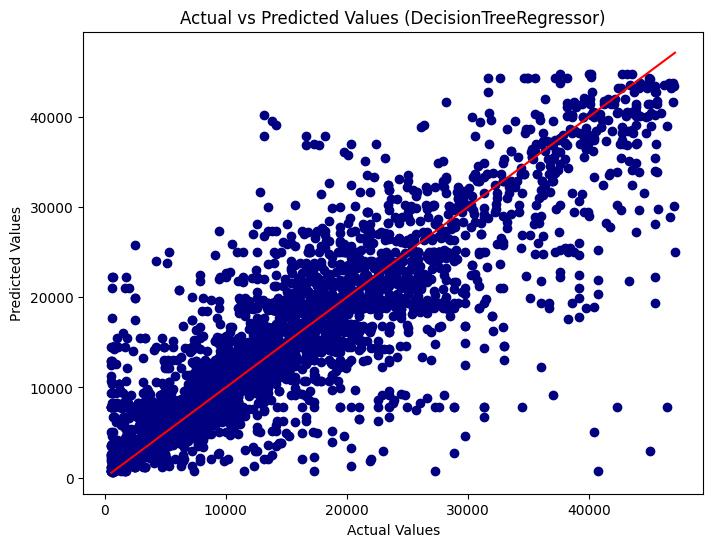

In [41]:
plot_predictions(y_test, y_pred_test, 'DecisionTreeRegressor')

In [42]:
result = pd.DataFrame({'Algorithm used':['DecisionTreeRegressor'],
                       'R2 score of test data':[r2_score_test],
                       'MAE score of test data': [mae_score_test]})
result

,Algorithm used,R2 score of test data,MAE score of test data
0,DecisionTreeRegressor,0.702397,3798.686699


In [43]:
from sklearn.ensemble import ExtraTreesRegressor

extra_reg = ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                    max_depth=None, max_features=15, max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=15, n_jobs=-1, oob_score=False,
                    random_state=3892, verbose=0, warm_start=False)
extra_reg.fit(X_train,y_train)

ExtraTreesRegressor(max_features=15, n_estimators=15, n_jobs=-1,
                    random_state=3892)

In [44]:
y_pred_test = extra_reg.predict(X_test)
r2_score_test = r2_score(y_test,y_pred_test)
mae_score_test = mae(y_test,y_pred_test)
print('R2 score for test set: {0}'.format(r2_score_test))
print('MAE score for test set: {0}'.format(mae_score_test))

R2 score for test set: 0.719123644443755
MAE score for test set: 3547.837042616821


In [45]:
result.loc[len(result)] = ['Extra Trees Regressor',r2_score_test, mae_score_test]
result

,Algorithm used,R2 score of test data,MAE score of test data
0,DecisionTreeRegressor,0.702397,3798.686699
1,Extra Trees Regressor,0.719124,3547.837043


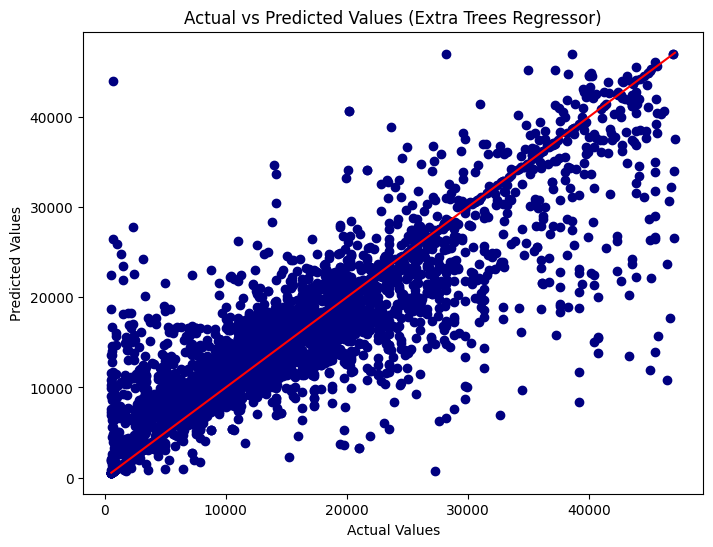

In [46]:
plot_predictions(y_test, y_pred_test, 'Extra Trees Regressor')

In [47]:
from sklearn.ensemble import RandomForestRegressor
r_forest = RandomForestRegressor()
r_forest.fit(X_train,y_train)

RandomForestRegressor()

In [48]:
y_pred_test = r_forest.predict(X_test)
r2_score_test = r2_score(y_test,y_pred_test)
mae_score_test = mae(y_test,y_pred_test)
print('R2 score for test set: {0}'.format(r2_score_test))
print('MAE score for test set: {0}'.format(mae_score_test))

R2 score for test set: 0.8110281450186033
MAE score for test set: 2901.9319941192643


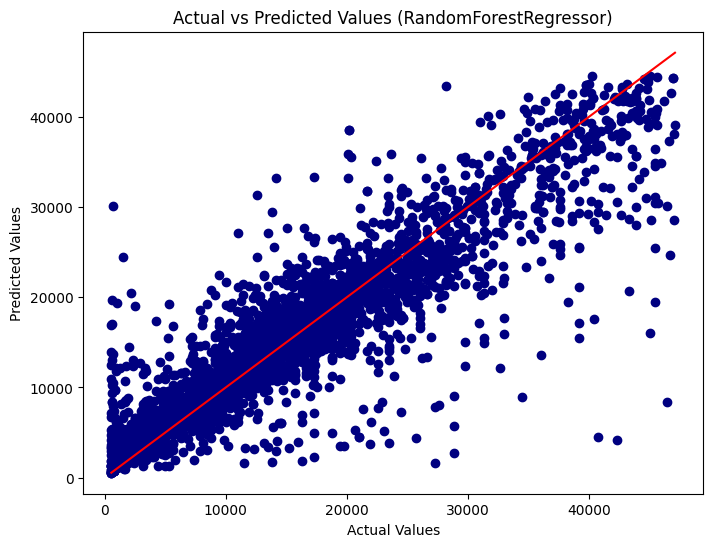

In [49]:
plot_predictions(y_test, y_pred_test, 'RandomForestRegressor')

In [50]:
result.loc[len(result)] = ['RandomForestRegressor',r2_score_test, mae_score_test]
result

,Algorithm used,R2 score of test data,MAE score of test data
0,DecisionTreeRegressor,0.702397,3798.686699
1,Extra Trees Regressor,0.719124,3547.837043
2,RandomForestRegressor,0.811028,2901.931994


In [51]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [52]:
y_pred_test = xgb_model.predict(X_test)
r2_score_test = r2_score(y_test,y_pred_test)
mae_score_test = mae(y_test,y_pred_test)
print('R2 score for test set: {0}'.format(r2_score_test))
print('MAE score for test set: {0}'.format(mae_score_test))

R2 score for test set: 0.8054114354108346
MAE score for test set: 3210.266306305167


In [53]:
result.loc[len(result)] = ['XGBRegressor',r2_score_test, mae_score_test]
result

,Algorithm used,R2 score of test data,MAE score of test data
0,DecisionTreeRegressor,0.702397,3798.686699
1,Extra Trees Regressor,0.719124,3547.837043
2,RandomForestRegressor,0.811028,2901.931994
3,XGBRegressor,0.805411,3210.266306


In [54]:
import lightgbm as lgb
lgb_model = lgb.LGBMRegressor(random_state=42, force_row_wise='true')
lgb_model.fit(X_train,y_train)

[LightGBM] [Info] Total Bins 719
[LightGBM] [Info] Number of data points in the train set: 7565, number of used features: 125
[LightGBM] [Info] Start training from score 16251.874554


LGBMRegressor(force_row_wise='true', random_state=42)

In [55]:
y_pred_test = lgb_model.predict(X_test)
r2_score_test = r2_score(y_test,y_pred_test)
mae_score_test = mae(y_test,y_pred_test)
print('R2 score for test set: {0}'.format(r2_score_test))
print('MAE score for test set: {0}'.format(mae_score_test))

R2 score for test set: 0.8004161052642031
MAE score for test set: 3226.8855448879735


In [56]:
result.loc[len(result)] = ['LGBMRegressor',r2_score_test, mae_score_test]
result

,Algorithm used,R2 score of test data,MAE score of test data
0,DecisionTreeRegressor,0.702397,3798.686699
1,Extra Trees Regressor,0.719124,3547.837043
2,RandomForestRegressor,0.811028,2901.931994
3,XGBRegressor,0.805411,3210.266306
4,LGBMRegressor,0.800416,3226.885545


In [57]:
result.sort_values(by=['R2 score of test data', 'MAE score of test data'], ascending=[False, False])

,Algorithm used,R2 score of test data,MAE score of test data
2,RandomForestRegressor,0.811028,2901.931994
3,XGBRegressor,0.805411,3210.266306
4,LGBMRegressor,0.800416,3226.885545
1,Extra Trees Regressor,0.719124,3547.837043
0,DecisionTreeRegressor,0.702397,3798.686699
